## LangGraph Fundamentals - FLow Engineering and Finite State Machine

LangGraph is a low level orchestration framework for building stateful, multi-agent applications. It is a way to create workflows where each step (node) processes data and passes it to the next step.

Key Concepts:
1. State: Shared Memory that all nodes can read and write to
2. Node: Functions that do specific tasks (like process data)
3. Edge: Connections between nodes that define the flow

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class SimpleState(TypedDict):
    input_text: str
    output_text: str

### Custom Node

In [4]:
def process_input(state: SimpleState):
    output_text = state['input_text'].upper()
    return {"output_text": output_text}

In [5]:
state = {"input_text": "hello", "output_text": ''}
process_input(state)

{'output_text': 'HELLO'}

Above is a simple example of how state works in langgraph 
We have defined a state with two keys, 1. input_text and 2. output_text, then we define a function a named `process_output` in which we simply make our input text upper case for output text, applying this function and we can clearly see the output_text as upper case version of input text

In [9]:
def add_prefix(state: SimpleState):
    output = "Hi, I have added something to the output " + state['output_text']
    return {"output_text": output}

In [10]:
add_prefix(state)

{'output_text': 'Hi, I have added something to the output '}

In [11]:
add_prefix(process_input(state))

{'output_text': 'Hi, I have added something to the output HELLO'}

In [14]:
def add_suffix(state: SimpleState):
    print("Current State [Suffix]", state)
    output = state['output_text'] + ". i have added suffix!"
    return {"output_text": output}

In [15]:
add_suffix(add_prefix(process_input(state)))

Current State [Suffix] {'output_text': 'Hi, I have added something to the output HELLO'}


{'output_text': 'Hi, I have added something to the output HELLO. i have added suffix!'}

In [16]:
def create_simple_graph():
    builder = StateGraph(SimpleState)

    builder.add_node("process_input", process_input)
    builder.add_node("add_prefix", add_prefix)
    builder.add_node("add_suffix", add_suffix)

    builder.add_edge(START, "process_input")
    builder.add_edge("process_input", "add_prefix")
    builder.add_edge("add_prefix", "add_suffix")
    builder.add_edge("add_suffix", END)

    graph = builder.compile()
    return graph

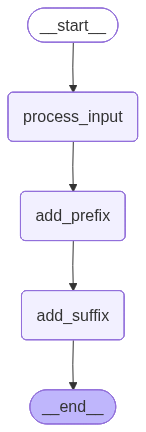

In [18]:
graph = create_simple_graph()
graph

In [19]:
initial_state = {"input_text": "hello"}
graph.invoke(initial_state)

Current State [Suffix] {'input_text': 'hello', 'output_text': 'Hi, I have added something to the output HELLO'}


{'input_text': 'hello',
 'output_text': 'Hi, I have added something to the output HELLO. i have added suffix!'}